<a href="https://colab.research.google.com/github/Reza-Tahmasbi/Pytorch/blob/main/pytorch_00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## 00. PyTorch Fundementals
# Resource notebook: https://www.learnpytorch.io/00_pytorch_fundamentals/

In [ ]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)

2.1.0+cu118


## Introduction to Tensors

## creating tensors

In [ ]:
# scalar
scalar = torch.tensor(7)
scalar

tensor(7)

#### A tensor can be constructed from a python list or sequence using the torch.tensor() constructor:

In [ ]:
torch.tensor([[1.,-1.], [1.,-1]])

tensor([[ 1., -1.],
        [ 1., -1.]])

In [ ]:
torch.tensor(np.array([[1,2,3],[4,5,6]]))

tensor([[1, 2, 3],
        [4, 5, 6]])

In [ ]:
torch.zeros([2,4], dtype  = torch.int32)

tensor([[0, 0, 0, 0],
        [0, 0, 0, 0]], dtype=torch.int32)

In [ ]:
cuda0 = torch.device('cuda:0')

In [ ]:
cuda0

device(type='cuda', index=0)

#### A tensor of specific data type can be constructed by passing a torch.dtype and/or a torch.device to a constructor or tensor creation op:

In [ ]:
torch.ones([2,4], dtype = torch.float64, device = cuda0)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], device='cuda:0', dtype=torch.float64)

#### The contents of a tensor can be accessed and modified using Python’s indexing and slicing notation:

In [ ]:
x = torch.tensor([[1,2,3],[4,5,6]])
print(x)

tensor([[1, 2, 3],
        [4, 5, 6]])


In [ ]:
x[0][1] = 8
print(x)

tensor([[1, 8, 3],
        [4, 5, 6]])


### Use torch.Tensor.item() to get a Python number from a tensor containing a single value:

In [ ]:
x = torch.tensor([[1]])
x

tensor([[1]])

In [ ]:
x.item()

1

In [ ]:
x = torch.tensor(2.5)
x

tensor(2.5000)

In [ ]:
x.item()

2.5

#### A tensor can be created with requires_grad=True so that torch.autograd records operations on them for automatic differentiation.

In [ ]:
x = torch.tensor([[1.,-1.], [1.,1.]], requires_grad = True)
out = x.pow(2).sum()
out.backward()
x.grad

tensor([[ 2., -2.],
        [ 2.,  2.]])

In [ ]:
scalar = torch.tensor(7)
scalar

tensor(7)

In [ ]:
scalar.ndim

0

In [ ]:
# Get tensor back as python int
scalar.item()

7

In [ ]:
# vector
vector = torch.tensor([[7,7]])
vector

tensor([[7, 7]])

In [ ]:
vector.shape

torch.Size([1, 2])

In [ ]:
# MATRIX
MATRIX = torch.tensor([[7, 8],[9, 10]])
MATRIX

tensor([[ 7,  8],
        [ 9, 10]])

In [ ]:
MATRIX.ndim

2

In [ ]:
MATRIX[0]

tensor([7, 8])

In [ ]:
MATRIX.shape

torch.Size([2, 2])

In [ ]:
# TENSOR
TENSOR = torch.tensor([[[1,2,3],
                                            [3,6,9],
                                            [2,5,4]]])
TENSOR

tensor([[[1, 2, 3],
         [3, 6, 9],
         [2, 5, 4]]])

In [ ]:
TENSOR.ndim

3

In [ ]:
TENSOR.shape

torch.Size([1, 3, 3])

In [ ]:
TENSOR[0][1][0]

tensor(3)

1. scalar|a  single number|0|Lower(a)
2. vector|a  single number|1|Lower(y)
3. matrix|a  single number|2|Upper(Q)
4. tensor|a  single number|3|Upper(X)

### Random tensors


Why random tensors?
Random tensors are important because the way many neural networks learn is that
they start with rensor full of random numbers and then adjsust thise random numbers
to better represent the data.

'start with random numbers -> look at data -> update random numbers ->look at data-> update random numbers'

Torch random tensors - https://pytorch.org/docs/stable/generated/torch.rand.html

In [ ]:
# Create a random tensor of size (3, 4)
random_tensor = torch.rand(2,3, 4)
random_tensor

tensor([[[0.5247, 0.6686, 0.2526, 0.7116],
         [0.5020, 0.2265, 0.7744, 0.6624],
         [0.5740, 0.2449, 0.3569, 0.1291]],

        [[0.2124, 0.3365, 0.9304, 0.3057],
         [0.0607, 0.1064, 0.8818, 0.9113],
         [0.8622, 0.9984, 0.0049, 0.4618]]])

In [ ]:
 random_tensor.ndim

3

In [ ]:
# Create a random tensor with similar shape of an image tensor
random_image_size_tensor = torch.rand(size = (224, 224, 3)) # height with colour channels( R,G,B)
random_image_size_tensor.shape, random_image_size_tensor.ndim

(torch.Size([224, 224, 3]), 3)

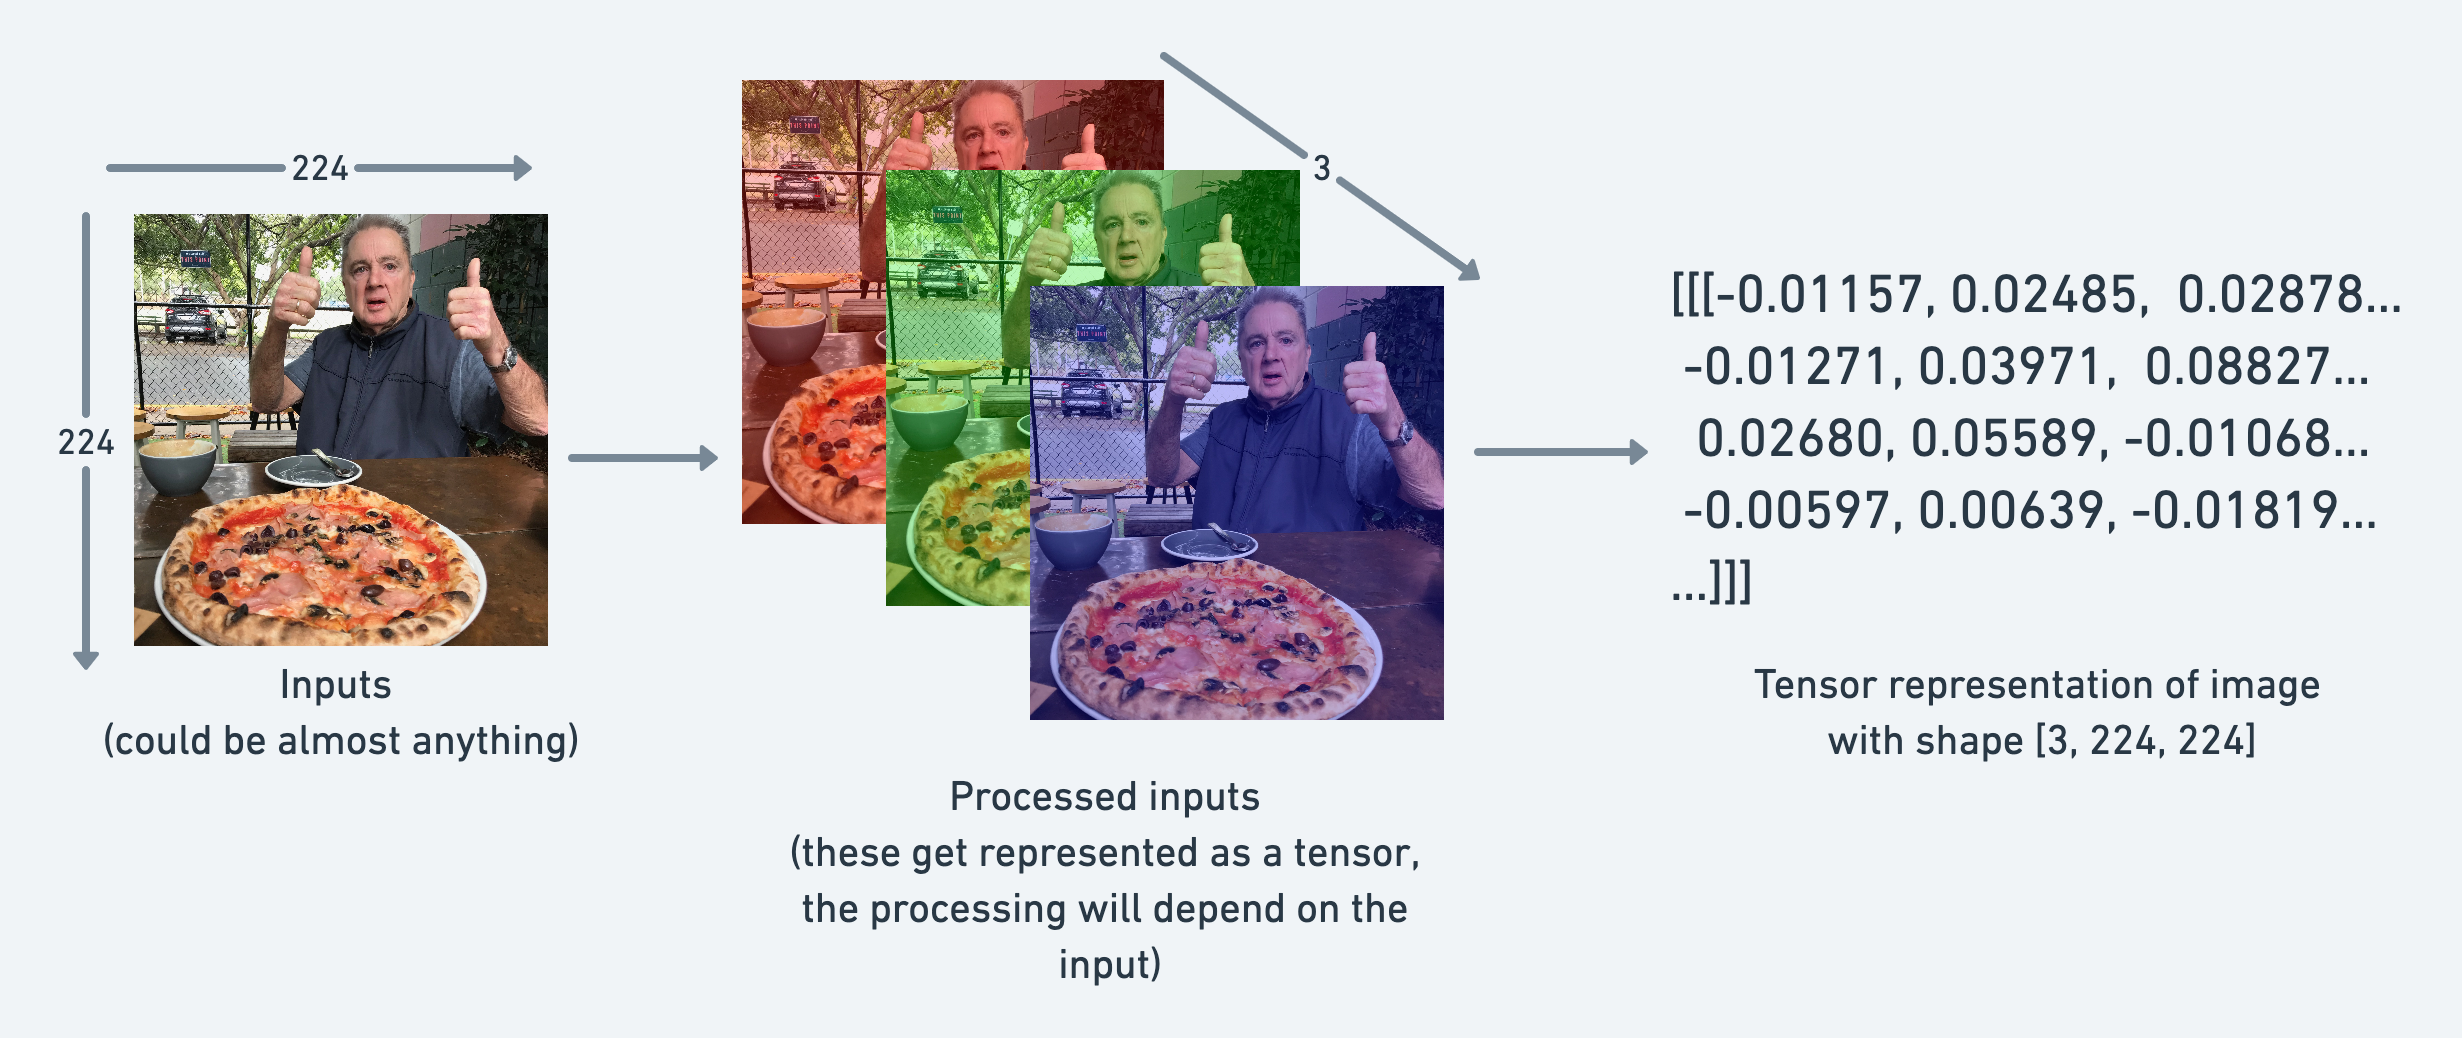

In [ ]:
torch.rand(size = (3,3))

tensor([[0.7167, 0.7271, 0.5170],
        [0.1030, 0.2542, 0.3601],
        [0.5167, 0.0701, 0.2828]])

## Zeros and Ones

In [ ]:
# Create a tensor of all zeros
zeros = torch.zeros(size = (3, 4))
zeros

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [ ]:
zeros * random_tensor

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [ ]:
# Create tensor of all ones
ones = torch.ones(size = (3,5))
ones

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

In [ ]:
ones.dtype

torch.float32

In [ ]:
random_tensor.dtype

torch.float32

### Create a range of tensors and tensors-like

In [ ]:
# Use torch.arange()
one_to_ten = torch.arange(start = 1, end = 11, step = 1)
one_to_ten

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
# Creating tensors like
one_to_ten

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
ten_zeros = torch.ones_like(input = one_to_ten)
# ten_zeros = torch.zeros_like(input = one_to_ten)
ten_zeros

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
17. Dealing With Tensor Data Types.mp4